<a href="https://colab.research.google.com/github/gptakshitiz/Quora-Test/blob/main/Test_for_Indigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


--2025-07-03 16:39:20--  https://huggingface.co/datasets/toughdata/quora-question-answer-dataset/resolve/main/Quora-QuAD.jsonl
Resolving huggingface.co (huggingface.co)... 18.164.174.118, 18.164.174.23, 18.164.174.17, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.118|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/6a/02/6a02a59c5073e52530e7d27f048b54b1a6003eac7cffa3fe16e9966947a9cc17/1a56583136a87a6d7243e8be71d26fe826292b7c12694c91b51be87c574b4c57?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27Quora-QuAD.jsonl%3B+filename%3D%22Quora-QuAD.jsonl%22%3B&Expires=1751564360&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc1MTU2NDM2MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy82YS8wMi82YTAyYTU5YzUwNzNlNTI1MzBlN2QyN2YwNDhiNTRiMWE2MDAzZWFjN2NmZmEzZmUxNmU5OTY2OTQ3YTljYzE3LzFhNTY1ODMxMzZhODdhNmQ3MjQzZThiZTcxZDI2ZmU4MjYyOTJiN2MxMjY5NGM5MWI1MWJlODdjNTc0YjRjN

100%|██████████| 56402/56402 [00:11<00:00, 4799.15it/s]


✅ CSVs saved:
- train_quora_clean.csv
- test_quora_clean.csv


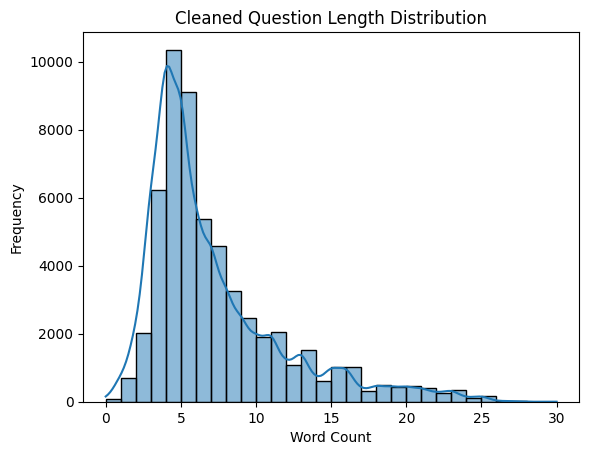

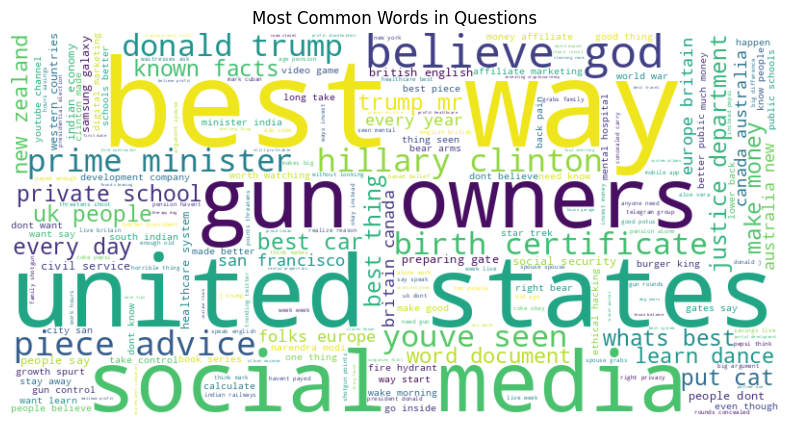

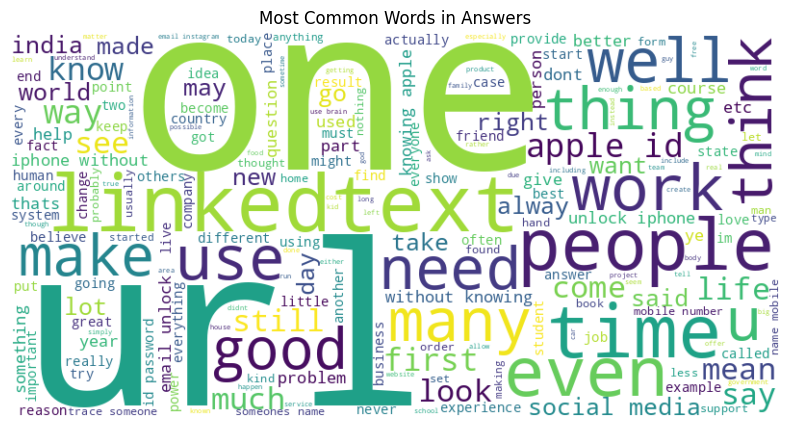

Q: good businesses started small capital
A: well let give idea look gadget phone store business really good business majority looking well business consultant seen benefit business dont really need large capital start least depending fast want see profit look wholesales vendor good one buy good negotiable discounts buy lot latest phones like iphone latest samsung phones comes high biding go lot buy discounts recommended store sells like discount prices depends amount orders buying discount sell discount original price store draw attention people wanting purchase lot would bring profit strategy dedicated year good store running trust make sure get good vendor wholesales let give details store recommend linkedtext techubgadgetyahoocom url mailtotechubgadgetyahoocom text whatsapp make enquiry negotiate well beat price worldwide delivery hub
(Similarity: 0.498)
------


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:390: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


{'score': 0.9959372878074646, 'start': 0, 'end': 15, 'answer': 'Mark Zuckerberg'}


In [1]:
# STEP 1: Install & Import
!pip install datasets nltk pandas matplotlib seaborn wordcloud --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from tqdm import tqdm
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# STEP 2: Download Dataset
!wget -O Quora-QuAD.jsonl https://huggingface.co/datasets/toughdata/quora-question-answer-dataset/resolve/main/Quora-QuAD.jsonl

df = pd.read_json("Quora-QuAD.jsonl", lines=True)
print("Shape:", df.shape)
print("Columns:", df.columns)
df.sample(2)

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

tqdm.pandas()
df['clean_question'] = df['question'].progress_apply(clean_text)
df['clean_answer'] = df['answer'].progress_apply(clean_text)

df[['clean_question', 'clean_answer']].head()



from sklearn.model_selection import train_test_split

# Only keep cleaned columns
clean_df = df[['clean_question', 'clean_answer']].dropna()

# Split: 90% train, 10% test
train_df, test_df = train_test_split(clean_df, test_size=0.1, random_state=42)

# Save to CSV
train_df.to_csv("train_quora_clean.csv", index=False)
test_df.to_csv("test_quora_clean.csv", index=False)

print("✅ CSVs saved:")
print("- train_quora_clean.csv")
print("- test_quora_clean.csv")

# Distribution of question lengths
clean_df['question_length'] = clean_df['clean_question'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['question_length'], bins=30, kde=True)
plt.title("Cleaned Question Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# WordCloud for questions
question_words = " ".join(clean_df['clean_question'])
wordcloud_q = WordCloud(width=800, height=400, background_color='white').generate(question_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_q, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Questions")
plt.show()


# WordCloud for answers
answer_words = " ".join(clean_df['clean_answer'])
wordcloud_a = WordCloud(width=800, height=400, background_color='white').generate(answer_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Answers")
plt.show()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Fit TF-IDF on train set questions
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['clean_question'])

def get_answer(query, top_k=1):
    query_clean = clean_text(query)
    query_vec = tfidf_vectorizer.transform([query_clean])
    similarity_scores = cosine_similarity(query_vec, tfidf_matrix).flatten()
    top_idx = similarity_scores.argsort()[-top_k:][::-1]

    for idx in top_idx:
        print(f"Q: {train_df.iloc[idx]['clean_question']}")
        print(f"A: {train_df.iloc[idx]['clean_answer']}")
        print(f"(Similarity: {similarity_scores[idx]:.3f})")
        print("------")

# 🔍 Example
get_answer("What is the capital of India?")

from transformers import pipeline

qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")

result = qa_pipeline({
    'question': "Who is the founder of Facebook?",
    'context': "Mark Zuckerberg is the founder and CEO of Facebook."
})
print(result)